<a href="https://colab.research.google.com/github/jithesh9539/CMPE_255_hotel/blob/main/hotel_booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
import seaborn as sns
import folium
from folium import plugins
from google.colab import files
uploaded=files.upload()


Saving hotel_bookings.csv to hotel_bookings (2).csv


 
**Data Load: Load hotel prediction cancellation data into a dataframe**

In [16]:
df1=pd.read_csv("hotel_bookings.csv")


In [17]:
df1.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [18]:
df1.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,23798.000000,2385.000000,29999.000000,29999.000000,29999.000000,29999.000000
mean,0.370479,97.199473,2015.881729,28.552585,15.792793,1.197173,3.147938,1.874996,0.131004,0.013434,0.048902,0.135705,0.182206,0.263442,214.313346,225.231447,0.587153,94.262805,0.124237,0.566052
std,0.482941,99.238920,0.649647,13.443859,8.915288,1.141013,2.438260,0.761892,0.452606,0.116849,0.215666,1.541312,1.141734,0.693878,84.276893,115.642820,7.856232,60.311077,0.337056,0.785453
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,12.000000,2015.000000,18.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,208.000000,135.000000,0.000000,50.000000,0.000000,0.000000
50%,0.000000,64.000000,2016.000000,30.000000,16.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,223.000000,0.000000,75.000000,0.000000,0.000000
75%,1.000000,162.000000,2016.000000,39.000000,24.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,242.000000,292.000000,0.000000,125.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,2.000000,1.000000,26.000000,30.000000,17.000000,531.000000,543.000000,150.000000,508.000000,8.000000,5.000000


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           29999 non-null  object 
 1   is_canceled                     29999 non-null  int64  
 2   lead_time                       29999 non-null  int64  
 3   arrival_date_year               29999 non-null  int64  
 4   arrival_date_month              29999 non-null  object 
 5   arrival_date_week_number        29999 non-null  int64  
 6   arrival_date_day_of_month       29999 non-null  int64  
 7   stays_in_weekend_nights         29999 non-null  int64  
 8   stays_in_week_nights            29999 non-null  int64  
 9   adults                          29999 non-null  int64  
 10  children                        29999 non-null  int64  
 11  babies                          29999 non-null  int64  
 12  meal                            

In [20]:
df1.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

Identifying the null values in Data

In [21]:
df1.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             461
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              6201
company                           27614


Replacing missing values

In [22]:
replace= {"children":0,"country":"None","agent":0,"company":0}
df1= df1.fillna(replace)

In [23]:
df1.isnull().sum()


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [24]:
df1['is_canceled'].value_counts()

0    18885
1    11114
Name: is_canceled, dtype: int64

In [25]:
df1['hotel'].value_counts()

Resort Hotel    29999
Name: hotel, dtype: int64

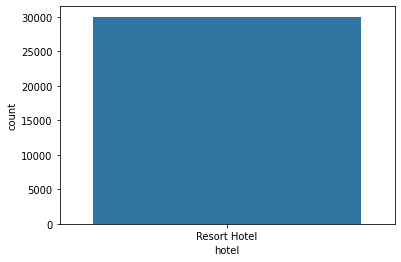

In [26]:
sns.countplot(x='hotel',data=df1)
plt.show()

In [27]:
df1.shape

(29999, 32)

Obtaining the target value to identify the percentage of cancellation by comparing with every columns in the table

In [28]:
df1['tget']=np.where(df1['is_canceled'].isin(['1']),1,0)


In [29]:
df1['tget'].mean()

0.3704790159671989

In [30]:
df1.groupby('country')['tget'].mean()


country
AGO    0.400000
ALB    0.333333
AND    0.750000
ARE    0.727273
ARG    0.214286
         ...   
VEN    0.333333
VNM    0.000000
ZAF    0.625000
ZMB    0.000000
ZWE    0.000000
Name: tget, Length: 115, dtype: float64

Finding good descrimanators for buiding a model

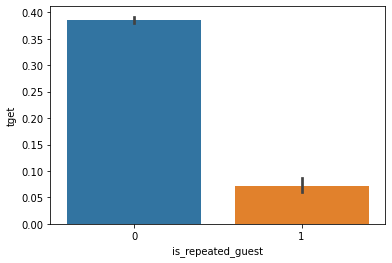

In [31]:
from numpy import mean
ax=sns.barplot(x='is_repeated_guest',y='tget',data=df1,estimator=mean)

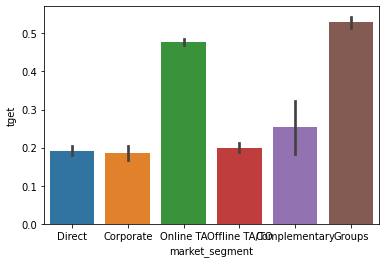

In [32]:
ax=sns.barplot(x='market_segment',y='tget',data=df1,estimator=mean)

In [33]:
df1.groupby('market_segment')['tget'].mean()

market_segment
Complementary    0.253846
Corporate        0.185441
Direct           0.190861
Groups           0.529538
Offline TA/TO    0.200423
Online TA        0.478114
Name: tget, dtype: float64

As undefined data is having only two datas we can ignore

In [34]:
df1.groupby('market_segment')['tget'].count()

market_segment
Complementary      130
Corporate         1882
Direct            4574
Groups            4672
Offline TA/TO     5673
Online TA        13068
Name: tget, dtype: int64

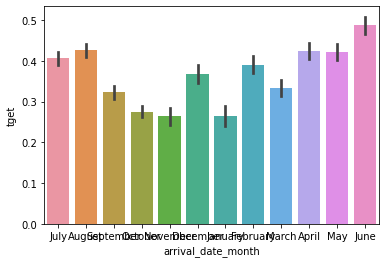

In [35]:
ax=sns.barplot(x='arrival_date_month',y='tget',data=df1,estimator=mean)

In [36]:
df1.groupby('arrival_date_month')['tget'].mean()

arrival_date_month
April        0.424449
August       0.426042
December     0.367716
February     0.390810
January      0.265306
July         0.406223
June         0.487651
March        0.333626
May          0.422902
November     0.264790
October      0.275493
September    0.323681
Name: tget, dtype: float64

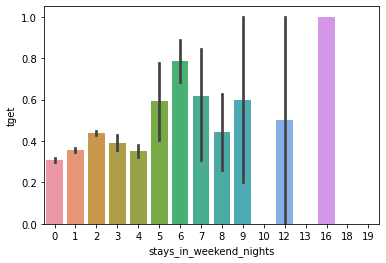

In [37]:
ax=sns.barplot(x='stays_in_weekend_nights',y='tget',data=df1,estimator=mean)


In [39]:
df1.groupby('stays_in_weekend_nights')['tget'].mean()

stays_in_weekend_nights
0     0.308219
1     0.356539
2     0.438146
3     0.392523
4     0.352641
5     0.592593
6     0.785714
7     0.615385
8     0.444444
9     0.600000
10    0.000000
12    0.500000
13    0.000000
16    1.000000
18    0.000000
19    0.000000
Name: tget, dtype: float64

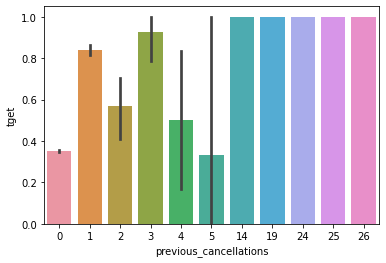

In [40]:
ax=sns.barplot(x='previous_cancellations',y='tget',data=df1,estimator=mean)

In [41]:
df1.groupby('previous_cancellations')['tget'].value_counts()

previous_cancellations  tget
0                       0       18717
                        1       10191
1                       1         749
                        0         143
2                       1          25
                        0          19
3                       1          13
                        0           1
4                       0           3
                        1           3
5                       0           2
                        1           1
14                      1          14
19                      1          19
24                      1          48
25                      1          25
26                      1          26
Name: tget, dtype: int64

In [42]:
df1['previous_cancel']=np.where(df1['previous_cancellations'].isin(['0']),0,1)


In [43]:
df1.groupby('previous_cancel')['target'].mean()

KeyError: ignored

In [44]:
target=['tget']
cnum=['adr','lead_time','stays_in_weekend_nights']
cchar=['total_of_special_requests','customer_type','reserved_room_type','distribution_channel','market_segment','previous_cancel']

In [45]:
X_dum=pd.get_dummies(df1[cchar],drop_first=True)

In [46]:
X_all=pd.concat([df1[cnum],X_dum],axis=1,join='inner')


In [48]:
X_var=X_all
Y_var=df1['tget']

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

X_train,X_test,y_train,y_test=train_test_split(X_var,Y_var,test_size=0.3,random_state=0)
logreg=LogisticRegression()
logreg.fit(X_train,y_train)


dtree=DecisionTreeClassifier(criterion="gini",random_state=100,max_depth=7,min_samples_leaf=5)
dtree.fit(X_train,y_train)

rf_1000=RandomForestClassifier(n_estimators=1000,
                               random_state=2,
                               criterion='gini',
                               max_features='auto',
                               max_depth=7)
rf_1000.fit(X_train,y_train)

y_pred=logreg.predict(X_test)
print('Accuracy of logistic regression on test set',format(logreg.score(X_test,y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy of logistic regression on test set 0.7476666666666667


In [55]:
y_pred_tree=dtree.predict(X_test)
print('Accuracy of decisison tree on test set',format(dtree.score(X_test,y_test)))

Accuracy of decisison tree on test set 0.7773333333333333


In [56]:
y_rf=rf_1000.predict(X_test)
print('Accuracy of random forest algo on test set',format(rf_1000.score(X_test,y_test)))


Accuracy of random forest algo on test set 0.7762222222222223
